In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("kidney_disease.csv").set_index("id")
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

## Feature Engineering

In [5]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


Let's check the unique values that our object datatypes has

In [6]:
cat_col = [col for col in df.columns if df[col].dtype == "object"]
for col in cat_col:
    print("{} has {} values".format(col, df[col].unique()))
    print('\n')

red_blood_cells has [nan 'normal' 'abnormal'] values


pus_cell has ['normal' 'abnormal' nan] values


pus_cell_clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


packed_cell_volume has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] values


white_blood_cell_count has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '220

Let's Perform Some transformation on some of the categorical features that has error in the dataset

In [7]:
df["class"] = df["class"].replace({"ckd\t":"ckd"})
df["class"].replace({"ckd":1, "notckd":0}, inplace=True) # We've converted the target varaible into binary values

#Transform the Coronary Column
df["coronary_artery_disease"].replace({"\tno":"no"}, inplace=True)

#Transform the Diabetes Colum
df.diabetes_mellitus.replace({"\tno":"no", "\tyes":"yes", " yes":"yes"}, inplace=True)


#Transform the white_blood_cell_count
df.white_blood_cell_count.replace({"\t8400":8400, "\t6200":6200}, inplace=True)

#Transform the packed_cell_volume
df.packed_cell_volume.replace({"\t43":43}, inplace=True)

#### Convert Some Categorical features into numerical dtypes

In [8]:
df["white_blood_cell_count"] = pd.to_numeric(df["white_blood_cell_count"], errors="coerce", downcast="integer")
df["packed_cell_volume"] = pd.to_numeric(df["packed_cell_volume"], errors="coerce", downcast="integer")
df["red_blood_cell_count"] = pd.to_numeric(df["red_blood_cell_count"], errors="coerce", downcast="float")

#### Also Convert some Numerical features that are qualitative features but looks like numerical features

The feautures that are qualitative but looks like numerical are **specific_gravity**, **sugar** and **albumin** since from the source at which the datset was recovered they described them as nominal data. So as we know nominal data are qualitative or categorical data

Before converting them into categorical data let's check if the data has missing values

In [9]:
df[["sugar", "specific_gravity", "albumin"]].isna().sum() / len(df) 

sugar               0.1225
specific_gravity    0.1175
albumin             0.1150
dtype: float64

Of Course there are some missing values in our data set so we have to fill them with the most occuring value for each feature

In [10]:
df["sugar"].value_counts(normalize=True)

0.0    0.826211
2.0    0.051282
3.0    0.039886
4.0    0.037037
1.0    0.037037
5.0    0.008547
Name: sugar, dtype: float64

In [11]:
df["sugar"].fillna(df["sugar"].mode()[0], inplace=True)

We will be filling the missing data in this column with the mode value which is 0, since 83% of the data equals to the data

In [12]:
df["albumin"].value_counts(normalize=True)

0.0    0.562147
1.0    0.124294
2.0    0.121469
3.0    0.121469
4.0    0.067797
5.0    0.002825
Name: albumin, dtype: float64

In [13]:
df["albumin"].fillna(df["albumin"].mode()[0], inplace=True)

We will be filling the missing data in this column with the mode value which is 0, since 56% of the data equals to the data

In [14]:
df["specific_gravity"].value_counts(normalize=True)

1.020    0.300283
1.010    0.237960
1.025    0.229462
1.015    0.212465
1.005    0.019830
Name: specific_gravity, dtype: float64

In [15]:
df.dropna(subset = "specific_gravity", inplace=True)

We are left with no other choice than to drop the missing data in this column, since the percentage of the modal value is 30% we can fill it like that

In [16]:
df["specific_gravity"] = df.specific_gravity.astype(str)
df["sugar"] = df["sugar"].astype(str)
df["albumin"] = df["albumin"].astype(str)

### Handling Missing Values

In [17]:
df.isna().sum()

age                          6
blood_pressure              10
specific_gravity             0
albumin                      0
sugar                        0
red_blood_cells            107
pus_cell                    21
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        40
blood_urea                  19
serum_creatinine            17
sodium                      77
potassium                   77
haemoglobin                 40
packed_cell_volume          52
white_blood_cell_count      78
red_blood_cell_count       101
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [18]:
df.describe()

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
count,347.000000,343.000000,313.000000,334.000000,336.000000,276.000000,276.000000,313.000000,301.000000,275.000000,252.000000,353.000000
mean,50.691643,75.947522,147.124601,54.230838,2.585417,138.155797,4.646377,12.768051,39.362126,8467.272727,4.756747,0.589235
std,17.285933,12.219610,78.697492,49.381600,3.713902,7.281434,3.386393,2.812757,8.691668,2970.982200,0.989303,0.492671
min,2.000000,50.000000,22.000000,1.500000,0.400000,104.000000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000
25%,41.000000,70.000000,99.000000,26.000000,0.900000,135.000000,3.800000,10.800000,33.000000,6600.000000,4.000000,0.000000
50%,54.000000,80.000000,121.000000,40.000000,1.200000,138.000000,4.400000,13.000000,41.000000,8100.000000,4.800000,1.000000
75%,64.000000,80.000000,160.000000,55.000000,2.500000,142.000000,4.900000,15.000000,46.000000,9800.000000,5.500000,1.000000
max,90.000000,120.000000,490.000000,391.000000,32.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000


Let's Check the distribution of the feautures before we start to fill their missing values

In [19]:
mask = df.select_dtypes("number")
len(mask.columns)

12

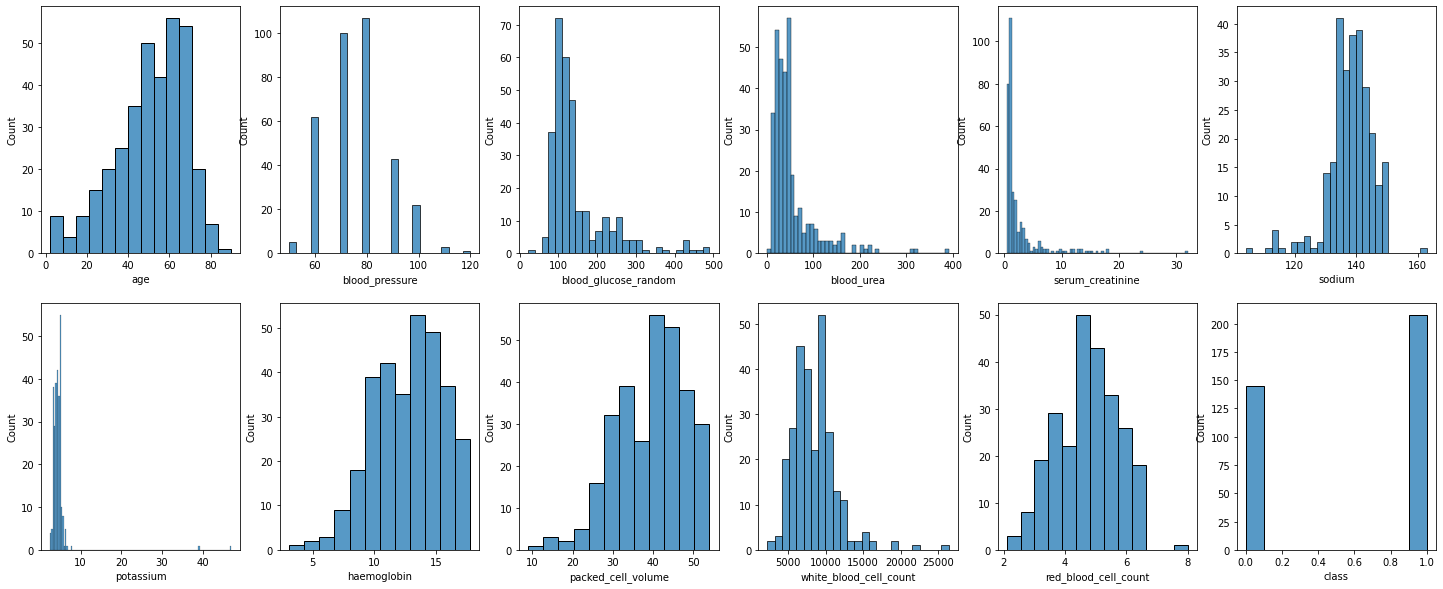

In [20]:
fig, ax = plt.subplots(2, 6, figsize = (25, 10))
counter = 0
for i in range(2):
    for j in range(6):
        sns.histplot(df[mask.columns[counter]], ax=ax[i, j])
        counter +=1

Interesting Let's look at some of our feature so we know what's going on with them

In [21]:
df["red_blood_cells"].value_counts(normalize=True)

normal      0.808943
abnormal    0.191057
Name: red_blood_cells, dtype: float64

We will fill the red blood cell with the majority class

In [22]:
df["red_blood_cells"].fillna(df["red_blood_cells"].mode()[0], inplace=True)

In [23]:
df["red_blood_cell_count"].describe()

count    252.000000
mean       4.756747
std        0.989303
min        2.100000
25%        4.000000
50%        4.800000
75%        5.500000
max        8.000000
Name: red_blood_cell_count, dtype: float64

We will fill the red_blood_cell_count with the mean value of the column

In [24]:
df["red_blood_cell_count"].fillna(df["red_blood_cell_count"].mean(), inplace=True)

In [25]:
df["blood_pressure"].describe()

count    343.000000
mean      75.947522
std       12.219610
min       50.000000
25%       70.000000
50%       80.000000
75%       80.000000
max      120.000000
Name: blood_pressure, dtype: float64

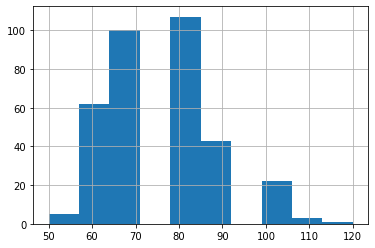

In [26]:
df["blood_pressure"].hist();

We definitely have some outliers that we need to cut off in this dataset.  How'ever we will be filling the feature with the median class

In [27]:
df["serum_creatinine"].describe()

count    336.000000
mean       2.585417
std        3.713902
min        0.400000
25%        0.900000
50%        1.200000
75%        2.500000
max       32.000000
Name: serum_creatinine, dtype: float64

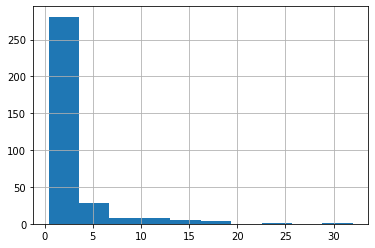

In [28]:
df["serum_creatinine"].hist();

The Serum_creatinine has much outliers that we don need to cut off. We will be filling its missing value with the mean class

In [29]:
df["sodium"].describe()

count    276.000000
mean     138.155797
std        7.281434
min      104.000000
25%      135.000000
50%      138.000000
75%      142.000000
max      163.000000
Name: sodium, dtype: float64

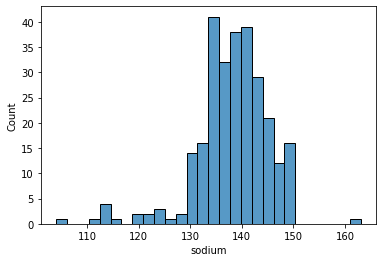

In [30]:
sns.histplot(df["sodium"]);

We also need to do some cutting off in the sodium column and we will be filling its mean class

In [31]:
df["potassium"].describe()

count    276.000000
mean       4.646377
std        3.386393
min        2.500000
25%        3.800000
50%        4.400000
75%        4.900000
max       47.000000
Name: potassium, dtype: float64

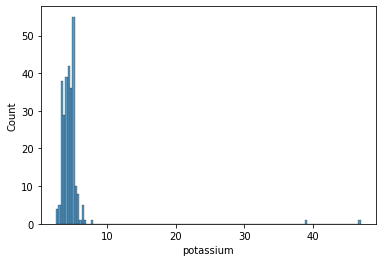

In [32]:
sns.histplot(df["potassium"]);

The Potassium Column also has some outliers we need to do some cutting off also and we will fill the missing value with mean of the class

In [33]:
df["sugar"].value_counts()

0.0    294
2.0     18
3.0     13
1.0     13
4.0     12
5.0      3
Name: sugar, dtype: int64


### Cutting Off the Outliers

In [34]:
def cut_outliers(df, columns, cut):
    
    for col in columns:
        low, high = df[col].quantile(cut)
        mask = df[col].between(low, high)
        df = df[mask]

    return df

In [35]:
columns = ["blood_pressure", "potassium", "sodium", "serum_creatinine"]
df = cut_outliers(df, columns, [0.1, 0.97])

In [36]:
cols = ["blood_glucose_random", "blood_urea", "white_blood_cell_count"]
df =cut_outliers(df, cols, [0.0, 0.98])

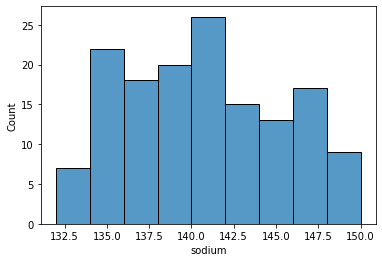

In [37]:
sns.histplot(df["sodium"]);

#### Fill Other columns with the mode class

In [38]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

**Relationship Of Some Categorical Features With the Target Variable**

In [39]:
df["specific_gravity"].value_counts()

1.025    58
1.02     54
1.015    17
1.01     17
1.005     1
Name: specific_gravity, dtype: int64

In [40]:
mask_ca = df.select_dtypes("O")
mask_ca

,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
id,,,,,,,,,,,,,
12,1.015,3.0,1.0,normal,normal,present,notpresent,yes,yes,yes,poor,yes,no
18,1.025,0.0,3.0,normal,normal,notpresent,notpresent,yes,yes,yes,good,no,no
20,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,yes,yes,yes,poor,yes,yes
25,1.025,0.0,0.0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,yes
31,1.015,3.0,0.0,normal,abnormal,present,notpresent,no,no,no,poor,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,1.02,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no
396,1.025,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no
397,1.02,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no


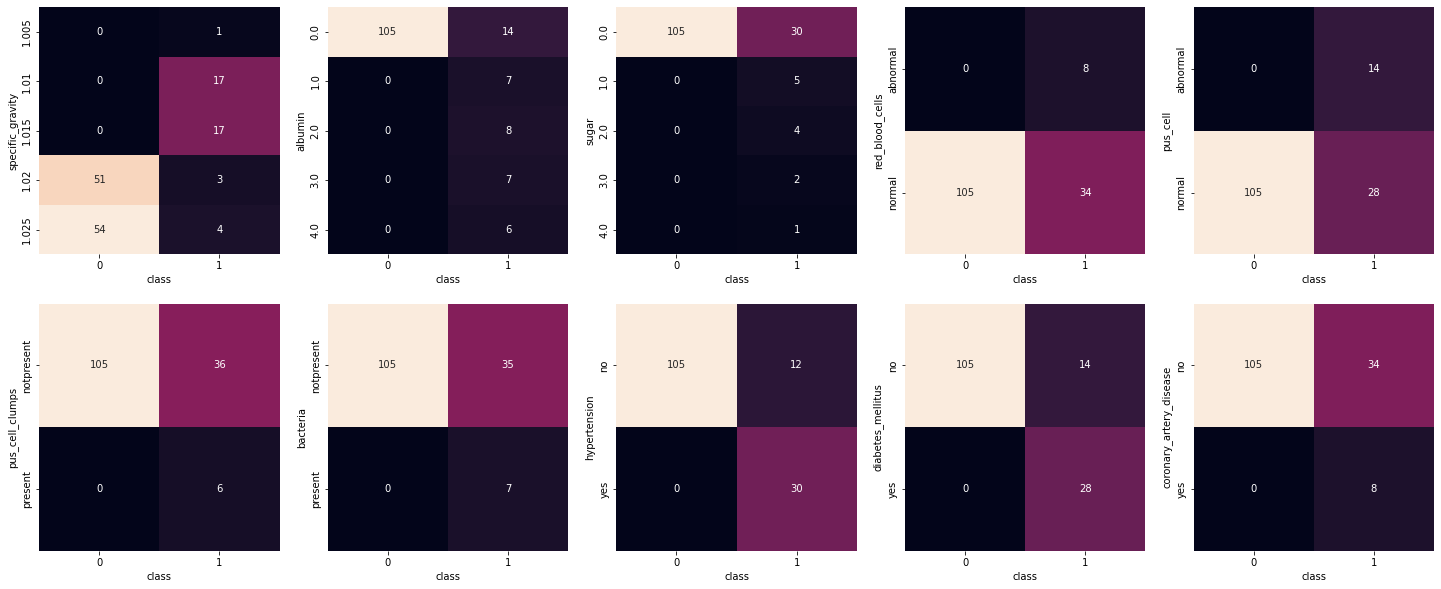

In [41]:
fig, ax = plt.subplots(2, 5, figsize = (25, 10))
counter = 0
for i in range(2):
    for j in range(5):
        sns.heatmap(pd.crosstab(df[mask_ca.columns[counter]], df["class"]), cbar=False, annot=True, fmt=".4g", ax=ax[i, j], cmap = None)
        counter +=1



We Can see that in this dataset the categorical features has a relationship with the target variable. If a Patient has all this feature there is certainity that the patient will have a kidney disease. Interesting let's continue our EDA

In [42]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
id,,,,,,,,,,,,,,,,,,,,,
12,68.0,70.0,1.015,3.0,1.0,normal,normal,present,notpresent,208.0,...,28.0,12200.0,3.4,yes,yes,yes,poor,yes,no,1
18,60.0,100.0,1.025,0.0,3.0,normal,normal,notpresent,notpresent,263.0,...,37.0,11400.0,4.3,yes,yes,yes,good,no,no,1
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,1
25,61.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,108.0,...,29.0,8400.0,3.7,yes,yes,no,good,no,yes,1
31,73.0,90.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,107.0,...,30.0,7800.0,4.0,no,no,no,poor,no,no,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 12 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      147 non-null    float64
 1   blood_pressure           147 non-null    float64
 2   specific_gravity         147 non-null    object 
 3   albumin                  147 non-null    object 
 4   sugar                    147 non-null    object 
 5   red_blood_cells          147 non-null    object 
 6   pus_cell                 147 non-null    object 
 7   pus_cell_clumps          147 non-null    object 
 8   bacteria                 147 non-null    object 
 9   blood_glucose_random     147 non-null    float64
 10  blood_urea               147 non-null    float64
 11  serum_creatinine         147 non-null    float64
 12  sodium                   147 non-null    float64
 13  potassium                147 non-null    float64
 14  haemoglobin              

Let's Check the Summary Statistic of Some of the numerical features in the dataset

In [44]:
df.describe()

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,50.795918,73.877551,124.394558,42.374150,1.517687,140.367347,4.423810,13.993878,42.938776,8146.258503,5.024287,0.285714
std,16.038028,11.069456,48.056126,27.233443,1.322135,4.681765,0.594188,2.393891,7.690258,2049.332404,0.861509,0.453298
min,12.000000,60.000000,70.000000,10.000000,0.600000,132.000000,3.500000,4.800000,14.000000,4300.000000,3.200000,0.000000
25%,41.000000,60.000000,96.500000,25.000000,0.800000,136.000000,3.900000,12.850000,38.500000,6700.000000,4.500000,0.000000
50%,52.000000,70.000000,114.000000,37.000000,1.100000,140.000000,4.500000,14.300000,44.000000,7900.000000,5.000000,0.000000
75%,63.000000,80.000000,131.000000,48.000000,1.300000,144.000000,4.900000,15.800000,49.000000,9400.000000,5.700000,1.000000
max,90.000000,100.000000,352.000000,148.000000,8.500000,150.000000,5.800000,17.800000,54.000000,15200.000000,8.000000,1.000000


Let's check the association between the numerical features and the target variable

In [45]:
df.select_dtypes("number").columns

Index(['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea',
       'serum_creatinine', 'sodium', 'potassium', 'haemoglobin',
       'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
       'class'],
      dtype='object')

In [46]:
len( df.select_dtypes("number").columns)

12

In [47]:
mask = df.select_dtypes("number")

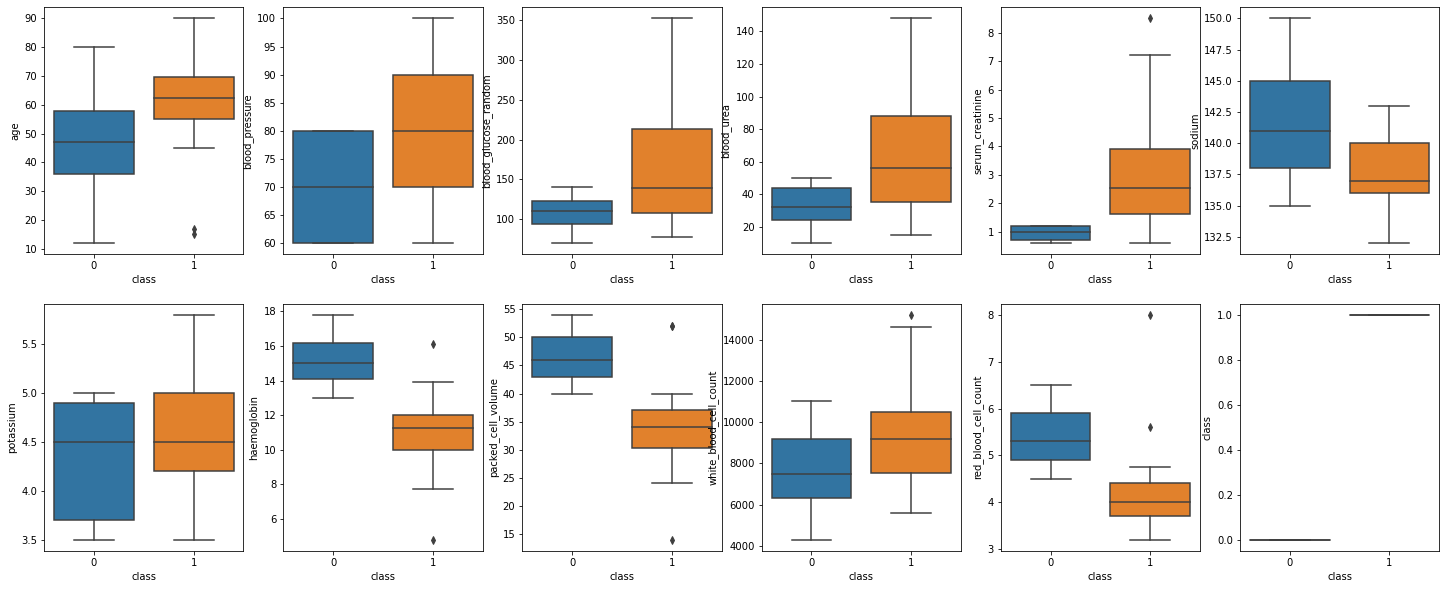

In [49]:
fig, ax = plt.subplots(2, 6, figsize = (25, 10))
counter = 0
for i in range(2):
    for j in range(6):
        sns.boxplot(df["class"], df[mask.columns[counter]],  ax=ax[i, j])
        counter +=1



In [50]:
df["red_blood_cell_count"].corr(df["class"])

-0.648060704587668

#### Let's check the relationship between age and the kidney disease

First off let's check the distribution of the age column

In [51]:
df["age"].describe()

count    147.000000
mean      50.795918
std       16.038028
min       12.000000
25%       41.000000
50%       52.000000
75%       63.000000
max       90.000000
Name: age, dtype: float64

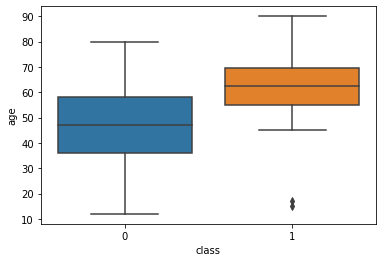

In [52]:
sns.boxplot(x = "class", y = "age", data=df);

We can postulate that there is a relationship between the age and the chances of kidney disease. That is as your age tends to increase there is chances of kidney disease

For other numerical features in the dataset we can also see that there are some relationship between them, so let's start transforming our features so it will be ready for modelling

Let's now perform our feature engineering by transforming all the feautures into their proper format so they will be ready for modelling

## Feature Engineering 2

In [53]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
id,,,,,,,,,,,,,,,,,,,,,
12,68.0,70.0,1.015,3.0,1.0,normal,normal,present,notpresent,208.0,...,28.0,12200.0,3.4,yes,yes,yes,poor,yes,no,1
18,60.0,100.0,1.025,0.0,3.0,normal,normal,notpresent,notpresent,263.0,...,37.0,11400.0,4.3,yes,yes,yes,good,no,no,1
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,1
25,61.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,108.0,...,29.0,8400.0,3.7,yes,yes,no,good,no,yes,1
31,73.0,90.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,107.0,...,30.0,7800.0,4.0,no,no,no,poor,no,no,1


In [54]:
df.select_dtypes("O").drop(columns = ["specific_gravity", "albumin", "sugar"]).replace({})

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
id,,,,,,,,,,
12,normal,normal,present,notpresent,yes,yes,yes,poor,yes,no
18,normal,normal,notpresent,notpresent,yes,yes,yes,good,no,no
20,abnormal,abnormal,notpresent,notpresent,yes,yes,yes,poor,yes,yes
25,normal,normal,notpresent,notpresent,yes,yes,no,good,no,yes
31,normal,abnormal,present,notpresent,no,no,no,poor,no,no
...,...,...,...,...,...,...,...,...,...,...
394,normal,normal,notpresent,notpresent,no,no,no,good,no,no
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [55]:
for i in ["red_blood_cells", "pus_cell"]:
    df[i] = df[i].replace({"normal":1, "abnormal":0})

for col in ["hypertension", "diabetes_mellitus", "coronary_artery_disease", "peda_edema", "aanemia"]:
    df[col] = df[col].replace({"yes":1, "no":0})

for col in ["bacteria", "pus_cell_clumps"]:
    df[col] = df[col].replace({"present":1, "notpresent":0})

df["appetite"] = df["appetite"].replace({"good":1, "poor":0})

In [56]:
from category_encoders import OneHotEncoder
transformer = OneHotEncoder(cols= ["specific_gravity", "albumin", "sugar"], use_cat_names=True)
df = transformer.fit_transform(df)

In [57]:
df.head()

,age,blood_pressure,specific_gravity_1.015,specific_gravity_1.025,specific_gravity_1.01,specific_gravity_1.02,specific_gravity_1.005,albumin_3.0,albumin_0.0,albumin_2.0,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
id,,,,,,,,,,,,,,,,,,,,,
12,68.0,70.0,1,0,0,0,0,1,0,0,...,28.0,12200.0,3.4,1,1,1,0,1,0,1
18,60.0,100.0,0,1,0,0,0,0,1,0,...,37.0,11400.0,4.3,1,1,1,1,0,0,1
20,61.0,80.0,1,0,0,0,0,0,0,1,...,24.0,9200.0,3.2,1,1,1,0,1,1,1
25,61.0,60.0,0,1,0,0,0,0,1,0,...,29.0,8400.0,3.7,1,1,0,1,0,1,1
31,73.0,90.0,1,0,0,0,0,1,0,0,...,30.0,7800.0,4.0,0,0,0,0,0,0,1


Let's check the target balance for us to know maybe we need to do some sampling technique or not

In [58]:
df["class"].value_counts(normalize=True)

0    0.714286
1    0.285714
Name: class, dtype: float64

So we need to do some resampling, but before that let's perform vertical and horizontal split to our data

In [59]:
X = df.drop(columns= "class")
y = df["class"]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from imblearn.over_sampling import RandomOverSampler

In [62]:
over = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over.fit_resample(X, y)

In [63]:
X_train_over.shape

(210, 36)

## Baseline Model

In [64]:
acc = y_train.value_counts(normalize=True).max()
print(f"The accuracy score for our baseline model is: {round(acc, 2)*100}%")

The accuracy score for our baseline model is: 74.0%


### Iterate Model

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=42)

In [67]:
clf.score(X_train, y_train)

1.0

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [69]:
accuracy_score(y_test, clf.predict(X_test))

1.0

In [70]:
confusion_matrix(y_test, clf.predict(X_test))

array([[19,  0],
       [ 0, 11]], dtype=int64)

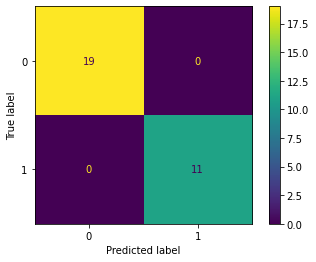

In [71]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

### Communicate Result

We will use check the gini importance using our random forest regressor and we will use logistic regression to know the feature importance (i.e how the features actually contributed to the target)

In [72]:
imp = clf.feature_importances_
feature_imp = pd.Series(imp, index = clf.feature_names_in_).sort_values()

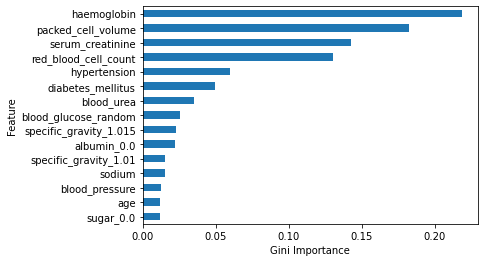

In [85]:
feature_imp.tail(15).plot.barh()
plt.xlabel("Gini Importance")
plt.ylabel("Feature");

We can see that the heamoglobin feauture contributed about 21% to our data. That is it is still a core thing to look at when dealing with Chronic Kidney Disease

#### Now let's know how those features really contributed

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
f = LogisticRegression()
f.fit(X_train_over, y_train_over)
f.score(X_train, y_train)

0.9658119658119658

In [86]:
feature_imp = pd.Series(f.coef_[0], index = f.feature_names_in_).sort_values(key=abs)

In [90]:
feature_imp.tail()

diabetes_mellitus       0.072556
red_blood_cell_count   -0.099713
serum_creatinine        0.107710
haemoglobin            -0.275175
packed_cell_volume     -0.494093
dtype: float64

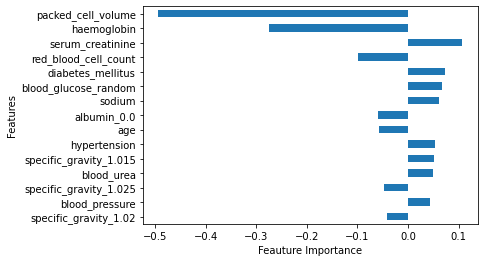

In [91]:
feature_imp.tail(15).plot.barh()
plt.xlabel("Feauture Importance")
plt.ylabel("Features");

We can see that the **packed_cell _volume and heamoglobin** contributed highly to having kidney disease. I.e if those features are low in the body there is tendency for a person to have **CKD**